# Fortune 500 Diversity

![](banner_fortune_500.jpg)

Gaussian Mixture Model Estimation by Expectation-Maximization

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
output_size(8, 5)

.................................................... start of document ....................................................

## Situation

Workforce diversity is an increasingly salient issue, but it can be difficult to easily check how a specific company is performing. This dataset was created by Fortune to show what was discoverable by someone considering employment with one of the Fortune 500 firms and curious about their commitment to diversity and inclusion could find.  This dataset contains the name of each firm, its rank in the 2017 Fortune 500, a link to its diversity and inclusion page or equal opportunity statement, and whether the company releases full, partial, or no data about the gender, race, and ethnicity of its employees. Additional detail is included where it was available. As there are over 200 fields in this dataset; please consult the data dictionary for details about specific features.  This dataset was assembled by Fortune.com data reporter Grace Donnelly. The details of her data preparation process can be found http://fortune.com/2017/06/16/why-we-logged-every-fortune-500-companys-diversity-data-or-lack-thereof/.

* **Role:**  Manager of workforce diversity.
* **Business Decision:**  Prioritize which policies to encourage workforce diversity, as compared to industry norms. 
* **Approach:** Partition fully-transparent Fortune 500 companies based on similarity in diversity using Gaussian mixture model estimation by expectation-maximization applied to personnel data.  Then explore distinguishing characteristics of the company clusters.
* **Dataset:** Fortune 500 Diversity Project (https://fortunedotcom.files.wordpress.com/2017/06/2017-f500-diversity-f500-diversity-data.csv)

## Data

**Data dictionary & dataset.**

In [2]:
dictionary = read.csv("data dictionary.csv")
size(dictionary)
dictionary

observations variables
1 212          4

Name            
1   f500-2017-rank  
2   name            
3   data-avail      
4   data-url        
5   diversity-pg-url
6   data-year       
7   PAYROLL_START   
8   PAYROLL_END     
9   HISPM1          
10  HISPM1_2        
11  HISPM2          
12  HISPM3          
13  HISPM4          
14  HISPM5          
15  HISPM6          
16  HISPM7          
17  HISPM8          
18  HISPM9          
19  HISPM10         
20  HISPM11         
21  HISPF1          
22  HISPF1_2        
23  HISPF2          
24  HISPF3          
25  HISPF4          
26  HISPF5          
27  HISPF6          
28  HISPF7          
29  HISPF8          
30  HISPF9          
... ...             
183 FT6             
184 FT7             
185 FT8             
186 FT9             
187 FT10            
188 FT11            
189 MT1             
190 MT1_2           
191 MT2             
192 MT3             
193 MT4             
194 MT5             
195 MT6             
196 MT7             
197 MT8             
198 MT9             
199 MT10            
200 MT11            
201 TOTAL1          
202 TOTAL1_2        
203 TOTAL2          
204 TOTAL3          
205 TOTAL4          
206 TOTAL5          
207 TOTAL6          
208 TOTAL7          
209 TOTAL8          
210 TOTAL9          
211 TOTAL10         
212 TOTAL11         
    Description                                                                                                                                           
1   Rank of the company on the 2017 Fortune 500                                                                                                           
2   Name of the company as it appears on the Fortune 500 list                                                                                             
3   Indicates whether the company publicly releases full employee diversity data (full data means it matches EEO-1 form fields), partial data, or no data 
4   The link to the site where the diversity data can be found online                                                                                     
5   The link to the webpage where the company has a commitment to diversity and/or inclusion or an equal opportunity employment statement                 
6   The year for which diversity data is available for the company, "n/a" if no data is publicly available                                                
7   Date marking the beginning of the payroll period in which the data was collected, "n/a" if no data is publicly available                              
8   Date marking the end of the payroll period in which the data was collected, "n/a" if no data is publicly available                                    
9   1-Senior OFF AND MGRS/HISPANIC/MALE                                                                                                                   
10  HISPANIC MID OFF AND MGRS                                                                                                                             
11  2-PROF/HISPANIC/MALE                                                                                                                                  
12  3-TECH/HISPANIC/MALE                                                                                                                                  
13  4-SALE/HISPANIC/MALE                                                                                                                                  
14  5-CLERICALS/HISPANIC/MALE                                                                                                                             
15  6-CRAFT/HISPANIC/MALE                                                                                                                                 
16  7-OPER/HISPANIC/MALE                                                                                                                                  
17  8-LABORS/HISPANIC/MALE                                         

In [3]:
data = read.csv("fortune 500 diversity.csv")
size(data)
data

observations variables
1 500          212

f500.2017.rank name                               data.avail
1    1             Wal-Mart Stores                    Partial   
2    2             Berkshire Hathaway                 N         
3    3             Apple                              Y         
4    4             Exxon Mobil                        N         
5    5             McKesson                           N         
6    6             UnitedHealth Group                 N         
7    7             CVS Health                         N         
8    8             General Motors                     N         
9    9             AT&T                               N         
10  10             Ford Motor                         N         
11  11             AmerisourceBergen                  N         
12  12             Amazon.com                         Y         
13  13             General Electric                   N         
14  14             Verizon Communications             N         
15  15             Cardinal Health                    N         
16  16             Costco Wholesale                   Y         
17  17             Walgreens Boots Alliance           N         
18  18             Kroger                             N         
19  19             Chevron                            N         
20  20             Fannie Mae                         N         
21  21             JPMorgan Chase & Co.               N         
22  22             Express Scripts Holding            N         
23  23             Home Depot                         N         
24  24             Boeing                             N         
25  25             Wells Fargo                        N         
26  26             Bank of America Corp.              N         
27  27             Alphabet                           Y         
28  28             Microsoft                          Y         
29  29             Anthem                             N         
30  30             Citigroup                          Y         
... ...            ...                                ...       
471 471            Fiserv                             N         
472 472            Host Hotels & Resorts              N         
473 473            Insight Enterprises                N         
474 474            Mattel                             N         
475 475            AmTrust Financial Services         N         
476 476            Cincinnati Financial               N         
477 477            Simon Property Group               N         
478 478            Western Union                      N         
479 479            KeyCorp                            N         
480 480            Delek US Holdings                  N         
481 481            Booz Allen Hamilton Holding        N         
482 482            Chemours                           N         
483 483            Western & Southern Financial Group N         
484 484            Celanese                           N         
485 485            Windstream Holdings                N         
486 486            Seaboard                           N         
487 487            Essendant                          N         
488 488            Apache                             N         
489 489            Airgas                             N         
490 490            Kelly Services                     N         
491 491            Liberty Media                      N         
492 492            Rockwell Collins                   N         
493 493            Robert Half International          N         
494 494            CH2M Hill                          N         
495 495            Big Lots                           N         
496 496            Michaels Cos.                      N         
497 497            Toll Brothers                      N         
498 498            Yahoo                              Y         
499 499            Vistra Energy                      N         
500 500            ABM Industries      

## Data Preparation

Inspect variable types.  Note that `n/a` values cause variables to be interpretted as categorical (factor).

In [4]:
str(data)

'data.frame':	500 obs. of  212 variables:
 $ f500.2017.rank  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name            : Factor w/ 500 levels "3M","A-Mark Precious Metals",..: 474 72 44 178 300 459 132 202 54 192 ...
 $ data.avail      : Factor w/ 3 levels "N","Partial",..: 2 1 3 1 1 1 1 1 1 1 ...
 $ data.url        : Factor w/ 101 levels "http://2015csr.hormelfoods.com/people/diversity/",..: 52 101 57 101 101 101 101 101 101 101 ...
 $ diversity.pg.url: Factor w/ 432 levels "http://about.att.com/sites/diversity",..: 25 432 284 20 153 201 239 330 1 233 ...
 $ data.year       : Factor w/ 5 levels "","2015","2016",..: 2 5 3 5 5 5 5 5 5 5 ...
 $ PAYROLL_START   : Factor w/ 10 levels "7/1/2016","7/10/2016",..: 10 10 1 10 10 10 10 10 10 10 ...
 $ PAYROLL_END     : Factor w/ 10 levels "7/1/2015","7/23/2016",..: 10 10 4 10 10 10 10 10 10 10 ...
 $ HISPM1          : Factor w/ 12 levels "0","1","18","2",..: 12 12 4 12 12 12 12 12 12 12 ...
 $ HISPM1_2        : Factor w/ 16 levels "100","106","1401",..

<br>

Read data again, this time account for `n/a` values.

In [5]:
data = read.csv("fortune 500 diversity.csv", na.strings="n/a")
dim(data)
data

[1] 500 212

f500.2017.rank name                               data.avail
1    1             Wal-Mart Stores                    Partial   
2    2             Berkshire Hathaway                 N         
3    3             Apple                              Y         
4    4             Exxon Mobil                        N         
5    5             McKesson                           N         
6    6             UnitedHealth Group                 N         
7    7             CVS Health                         N         
8    8             General Motors                     N         
9    9             AT&T                               N         
10  10             Ford Motor                         N         
11  11             AmerisourceBergen                  N         
12  12             Amazon.com                         Y         
13  13             General Electric                   N         
14  14             Verizon Communications             N         
15  15             Cardinal Health                    N         
16  16             Costco Wholesale                   Y         
17  17             Walgreens Boots Alliance           N         
18  18             Kroger                             N         
19  19             Chevron                            N         
20  20             Fannie Mae                         N         
21  21             JPMorgan Chase & Co.               N         
22  22             Express Scripts Holding            N         
23  23             Home Depot                         N         
24  24             Boeing                             N         
25  25             Wells Fargo                        N         
26  26             Bank of America Corp.              N         
27  27             Alphabet                           Y         
28  28             Microsoft                          Y         
29  29             Anthem                             N         
30  30             Citigroup                          Y         
... ...            ...                                ...       
471 471            Fiserv                             N         
472 472            Host Hotels & Resorts              N         
473 473            Insight Enterprises                N         
474 474            Mattel                             N         
475 475            AmTrust Financial Services         N         
476 476            Cincinnati Financial               N         
477 477            Simon Property Group               N         
478 478            Western Union                      N         
479 479            KeyCorp                            N         
480 480            Delek US Holdings                  N         
481 481            Booz Allen Hamilton Holding        N         
482 482            Chemours                           N         
483 483            Western & Southern Financial Group N         
484 484            Celanese                           N         
485 485            Windstream Holdings                N         
486 486            Seaboard                           N         
487 487            Essendant                          N         
488 488            Apache                             N         
489 489            Airgas                             N         
490 490            Kelly Services                     N         
491 491            Liberty Media                      N         
492 492            Rockwell Collins                   N         
493 493            Robert Half International          N         
494 494            CH2M Hill                          N         
495 495            Big Lots                           N         
496 496            Michaels Cos.                      N         
497 497            Toll Brothers                      N         
498 498            Yahoo                              Y         
499 499            Vistra Energy                      N         
500 500            ABM Industries      

<br>

Inspect variable types again.  Variables interpretted as numeric.

In [6]:
str(data)

'data.frame':	500 obs. of  212 variables:
 $ f500.2017.rank  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name            : Factor w/ 500 levels "3M","A-Mark Precious Metals",..: 474 72 44 178 300 459 132 202 54 192 ...
 $ data.avail      : Factor w/ 3 levels "N","Partial",..: 2 1 3 1 1 1 1 1 1 1 ...
 $ data.url        : Factor w/ 100 levels "http://2015csr.hormelfoods.com/people/diversity/",..: 52 NA 57 NA NA NA NA NA NA NA ...
 $ diversity.pg.url: Factor w/ 431 levels "http://about.att.com/sites/diversity",..: 25 NA 284 20 153 201 239 330 1 233 ...
 $ data.year       : int  2015 NA 2016 NA NA NA NA NA NA NA ...
 $ PAYROLL_START   : Factor w/ 9 levels "7/1/2016","7/10/2016",..: NA NA 1 NA NA NA NA NA NA NA ...
 $ PAYROLL_END     : Factor w/ 9 levels "7/1/2015","7/23/2016",..: NA NA 4 NA NA NA NA NA NA NA ...
 $ HISPM1          : int  NA NA 2 NA NA NA NA NA NA NA ...
 $ HISPM1_2        : int  NA NA 411 NA NA NA NA NA NA NA ...
 $ HISPM2          : int  NA NA 799 NA NA NA NA NA NA NA ...
 $ HISPM

<br>

Remove companies with incomplete information.  14 companies submitted complete data.

In [7]:
ok = complete.cases(data[,9:212])
data.ok = data[ok,]
size(data.ok)
data.ok

observations variables
1 14           212

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
3   2016      7/1/2016      7/31/2016    2      411      799   1709   25

## Cluster Model Construction & Analysis

Use Gaussian mixture model estimation by expectation-maximization.

**Organize data into 2 clusters, based on just the numeric variables.**

Amazon and Costco look different from the rest. 

In [8]:
set.seed(12345)
model = Mclust(data.ok[, 9:200], G=2)

data.ok$class = model$classification
data.ok

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1 HISPM1_2 HISPM2 HISPM3 HISPM4
3   2016      7/1/2016      7/31/2016    2      411      799   1709   25

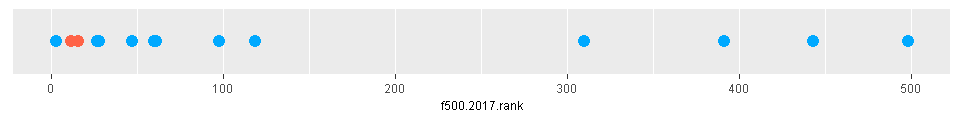

In [9]:
output_size(8, 1)
ggplot(data.ok) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

**Organize data into 2 clusters, based on *gender-related* numeric values.**

Amazon and Costco still look different from the rest.

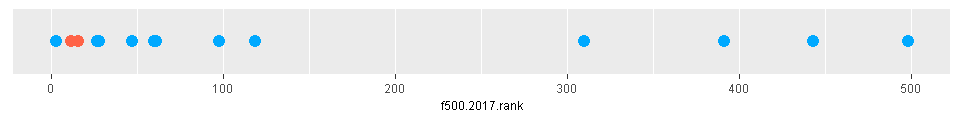

In [10]:
set.seed(12345)
model = Mclust(data.ok[,177:200], G=2) # only gender-related columns
data.ok$class = model$classification

output_size(8, 1)
ggplot(data.ok) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

**Organize data into 2 clusters, based on *race-related* numeric values.**

Amazon and Costco still look different from the rest.

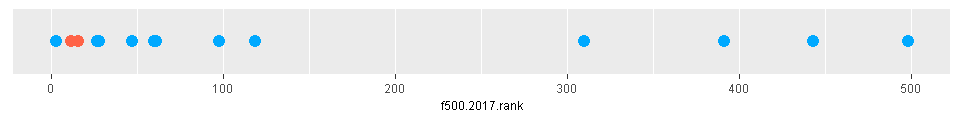

In [11]:
set.seed(12345)
model = Mclust(data.ok[,9:176], G=2) # only race-related columns
data.ok$class = model$classification

output_size(8, 1)
ggplot(data.ok) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

**To account for size of company, express information as proportions rather than absolute levels.**

Convert numeric values by dividing by totals, accounting for current and previous year.

In [12]:
this_year = c(9:19, 21:31, 33:43, 45:55, 57:67, 69:79, 81:91, 93:103, 105:115, 117:127, 129:139, 141:151, 153:163, 165:175, 177:187, 189:199)
previous_year = c(20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 200)

data.ok.prop = data.ok

for (i in this_year) data.ok.prop[, this_year] = data.ok[,this_year] / data.ok[,"TOTAL10"]
for (i in previous_year) data.ok.prop[, previous_year] = data.ok[,previous_year] / data.ok[,"TOTAL11"]

data.ok.prop

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1         HISPM1_2    HISPM2     
3   2016      7/1/2016      7/31/2016   0.000025909421 0.005324386 0.0

**Organize data into 2 clusters, based on *proportional* numeric values.**

Amazon and Costco still look different from the rest.

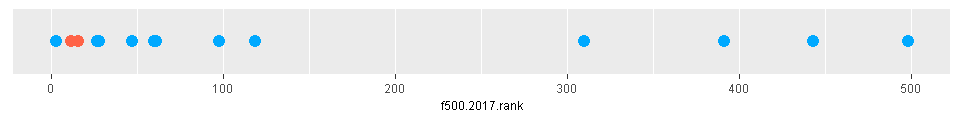

In [13]:
set.seed(12345)
model = Mclust(data.ok.prop[,9:200], G=2)
data.ok.prop$class = model$classification

output_size(8, 1)
ggplot(data.ok.prop) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

**Explore cluster assignment distinctions across variables.**

In [14]:
data.melt = melt(data.ok.prop[,c(2,213,9:200)], id=c("name","class"))
data.melt

name               class variable value         
1    Apple              1     HISPM1   0.000025909421
2    Amazon.com         2     HISPM1   0.000005729313
3    Costco Wholesale   2     HISPM1   0.000028099557
4    Alphabet           1     HISPM1   0.000000000000
5    Microsoft          1     HISPM1   0.000116790594
6    Intel              1     HISPM1   0.000018472338
7    Cisco Systems      1     HISPM1   0.000106592762
8    HP                 1     HISPM1   0.000401934831
9    Facebook           1     HISPM1   0.001065593180
10   Qualcomm           1     HISPM1   0.002273609494
11   eBay               1     HISPM1   0.000302526093
12   Jones Lang LaSalle 1     HISPM1   0.000180554302
13   Adobe Systems      1     HISPM1   0.000455857772
14   Yahoo              1     HISPM1   0.000676132522
15   Apple              1     HISPM1_2 0.005324385947
16   Amazon.com         2     HISPM1_2 0.002801634000
17   Costco Wholesale   2     HISPM1_2 0.009841869745
18   Alphabet           1     HISPM1_2 0.008252427184
19   Microsoft          1     HISPM1_2 0.006287227002
20   Intel              1     HISPM1_2 0.005948092731
21   Cisco Systems      1     HISPM1_2 0.004796674306
22   HP                 1     HISPM1_2 0.004199525994
23   Facebook           1     HISPM1_2 0.002604783329
24   Qualcomm           1     HISPM1_2 0.005878112350
25   eBay               1     HISPM1_2 0.004991680532
26   Jones Lang LaSalle 1     HISPM1_2 0.004468718967
27   Adobe Systems      1     HISPM1_2 0.006685913995
28   Yahoo              1     HISPM1_2 0.002974983097
29   Apple              1     HISPM2   0.010350813556
30   Amazon.com         2     HISPM2   0.004526157178
...  ...                ...   ...      ...           
2659 Adobe Systems      1     MT9      0.0000000     
2660 Yahoo              1     MT9      0.0000000     
2661 Apple              1     MT10     0.6925070     
2662 Amazon.com         2     MT10     0.5893458     
2663 Costco Wholesale   2     MT10     0.5650680     
2664 Alphabet           1     MT10     0.6689320     
2665 Microsoft          1     MT10     0.9418577     
2666 Intel              1     MT10     0.7404452     
2667 Cisco Systems      1     MT10     0.7376486     
2668 HP                 1     MT10     0.6701224     
2669 Facebook           1     MT10     0.7005683     
2670 Qualcomm           1     MT10     0.7958742     
2671 eBay               1     MT10     0.6410528     
2672 Jones Lang LaSalle 1     MT10     0.6684120     
2673 Adobe Systems      1     MT10     0.6877374     
2674 Yahoo              1     MT10     0.6897904     
2675 Apple              1     MT11     0.6999614     
2676 Amazon.com         2     MT11     0.6140787     
2677 Costco Wholesale   2     MT11     0.5652038     
2678 Alphabet           1     MT11     0.6749359     
2679 Microsoft          1     MT11     0.9454424     
2680 Intel              1     MT11     0.7551412     
2681 Cisco Systems      1     MT11     0.7404582     
2682 HP                 1     MT11     0.6693052     
2683 Facebook           1     MT11     0.7118087     
2684 Qualcomm           1     MT11     0.7905745     
2685 eBay               1     MT11     0.5683241     
2686 Jones Lang LaSalle 1     MT11     0.6757501     
2687 Adobe Systems      1     MT11     0.6881138     
2688 Yahoo              1     MT11     0.6813522

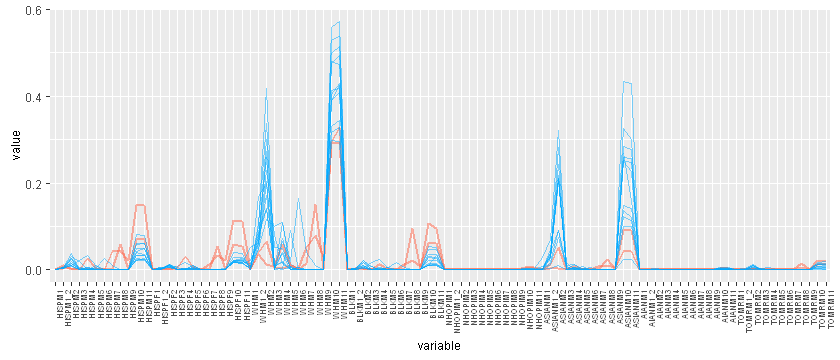

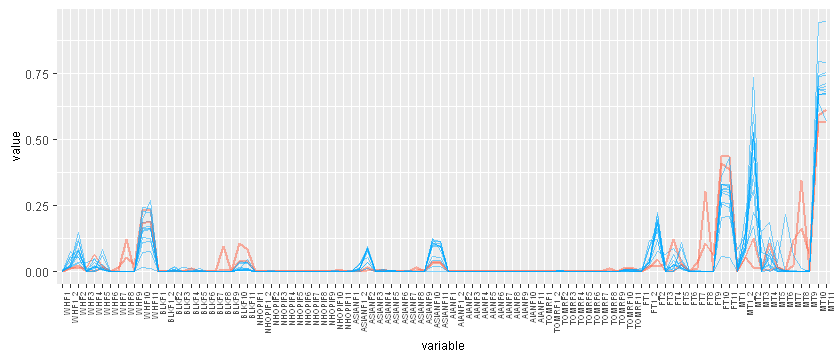

In [15]:
# Line charts of variable vs. value, color code by class - easier to read in 2 parts

data.melt.1 = melt(data.ok.prop[,c(2,213,9:104)], id=c("name","class"))
data.melt.2 = melt(data.ok.prop[,c(2,213,105:200)], id=c("name","class"))

ggplot(data.melt.1) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, size=factor(class)), alpha=0.5) +
scale_color_manual(values=PALETTE, guide="none") +
scale_size_manual(values=c(0.1, 0.7), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=5))

ggplot(data.melt.2) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, size=factor(class)), alpha=0.5) +
scale_color_manual(values=PALETTE, guide="none") +
scale_size_manual(values=c(0.1, 0.7), guide="none") +
theme(axis.text.x=element_text(hjust=1, angle=90, size=5))

**Consider results.**

Clusters distinguished by differences in ...
  * HISPM10,11 HISPF10,11 BLKM8,10,11 WHF10,11 FT10,11 (red higher, blue lower)
  * WHM10,11 ASIANM2,10,11 ASIANF2,10,11 MT2,10,11 (red lower, blue higher)
  
Perhaps because Amazon and Costco have large warehouses operations?

**Organize data into 2 clusters, based on *management-related proportional* numeric values.**

Identify variables related to management.

In [16]:
# Identify management-related columns

upper_mgmt = grep("^[A-Z]*1$", names(data.ok))[1:16]
middle_mgmt = grep("^[A-Z]*1_2$", names(data.ok))[1:16]

upper_mgmt
middle_mgmt

[1]   9  21  33  45  57  69  81  93 105 117 129 141 153 165 177 189

[1]  10  22  34  46  58  70  82  94 106 118 130 142 154 166 178 190

Upper management.

In [17]:
# Upper management
data.upper_mgmt.prop = cbind(data.ok[, 1:8], data.ok[, upper_mgmt]/data.ok[,"TOTAL1"])
size(data.upper_mgmt.prop)
data.upper_mgmt.prop

observations variables
1 14           24

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1      HISPF1      WHM1     
3   2016      7/1/2016      7/31/2016   0.018691589 0.000000000 0.6822430
1

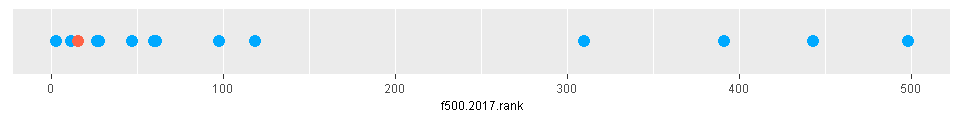

In [18]:
# Upper management

set.seed(12345)
model = Mclust(data.upper_mgmt.prop[, 9:24], G=2)
data.upper_mgmt.prop$class = model$classification

output_size(8, 1)
ggplot(data.upper_mgmt.prop) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

Middle management.

In [19]:
# Middle management

data.middle_mgmt.prop = cbind(data.ok[, 1:8], data.ok[, middle_mgmt]/data.ok[,"TOTAL1_2"])
size(data.middle_mgmt.prop)
data.middle_mgmt.prop

observations variables
1 14           24

f500.2017.rank name               data.avail
3     3            Apple              Y         
12   12            Amazon.com         Y         
16   16            Costco Wholesale   Y         
27   27            Alphabet           Y         
28   28            Microsoft          Y         
47   47            Intel              Y         
60   60            Cisco Systems      Y         
61   61            HP                 Y         
98   98            Facebook           Y         
119 119            Qualcomm           Y         
310 310            eBay               Y         
391 391            Jones Lang LaSalle Y         
443 443            Adobe Systems      Y         
498 498            Yahoo              Y         
    data.url                                                                                                           
3   https://images.apple.com/diversity/pdf/2016-EEO-1-Consolidated-Report.pdf                                          
12  https://images-na.ssl-images-amazon.com/images/G/01/Diversity_Campaign2016/Consolidated_EEO-1_2015.pdf             
16  https://m.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/homepage/2015-Certified-Consolidated-EEO-1-Report.pdf    
27  https://static.googleusercontent.com/media/www.google.com/en//diversity/pdf/google_2016_certified_eeo-1_reports.pdf
28  https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE10lMY                                                  
47  http://www.intel.com/content/www/us/en/diversity/diversity-2016-annual-report.html                                 
60  https://www.cisco.com/assets/csr/pdf/EEO1-2016.pdf                                                                 
61  http://www8.hp.com/h20195/v2/getpdf.aspx/c05169505.pdf                                                             
98  https://fbnewsroomus.files.wordpress.com/2016/07/eeo-1_2015.png                                                    
119 https://www.qualcomm.com/documents/eeo-1-report                                                                    
310 https://static.ebayinc.com/assets/Uploads/Documents/eBay-2016-EEO-1-Report.pdf                                     
391 https://www.jll.com/Documents/EEO-1.2014_2016.pdf                                                                  
443 http://wwwimages.adobe.com/content/dam/acom/en/diversity/pdfs/consolidated-eeo-1.pdf                               
498 https://s.yimg.com/ge/pr/Yahoo_EEO1-July_2015_Summary.pdf                                                          
    diversity.pg.url                                                                   
3   https://www.apple.com/diversity/                                                   
12  https://www.amazon.com/b?node=10080092011                                          
16  https://www.costco.com/inclusion.html                                              
27  https://www.google.com/diversity/                                                  
28  https://www.microsoft.com/en-us/diversity/inside-microsoft/default.aspx?Search=true
47  http://www.intel.com/content/www/us/en/diversity/diversity-at-intel.html           
60  http://www.cisco.com/c/en/us/about/inclusion-diversity.html                        
61  http://www8.hp.com/us/en/hp-information/about-hp/diversity/index.html              
98  https://www.facebook.com/facebookdiversity/                                        
119 https://www.qualcomm.com/company/sustainability/priorities/diversity-inclusion     
310 https://www.ebayinc.com/our-company/diversity-inclusion/                           
391 http://www.us.jll.com/united-states/en-us/careers/diversity-and-inclusion          
443 http://www.adobe.com/diversity.html                                                
498 https://about.yahoo.com/diversity                                                  
    data.year PAYROLL_START PAYROLL_END HISPM1_2   HISPF1_2   WHM1_2   
3   2016      7/1/2016      7/31/2016   0.05009141 0.01815966 0.4756856
12  2

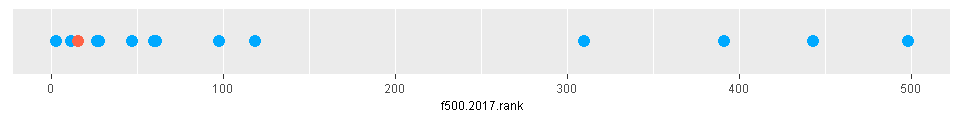

In [20]:
# Middle management

model = Mclust(data.middle_mgmt.prop[, 9:24], G=2)
data.middle_mgmt.prop$class = model$classification

output_size(8, 1)
ggplot(data.middle_mgmt.prop) + geom_point(aes(x=f500.2017.rank, y=0, color=factor(class))) + scale_color_manual(values=PALETTE) + theme.x_axis_only + theme.no_legend
output_size(restore)

**Consider results.**

Costco looks different from the rest.

**Explore cluster distinctions across variables.**

In [21]:
# Upper management
data.upper_mgmt.melt = melt(data.upper_mgmt.prop[, c(2,25,9:24)], id=c("name","class"))
data.upper_mgmt.melt

name               class variable value      
1   Apple              1     HISPM1   0.018691589
2   Amazon.com         1     HISPM1   0.009523810
3   Costco Wholesale   2     HISPM1   0.102564103
4   Alphabet           1     HISPM1   0.000000000
5   Microsoft          1     HISPM1   0.038216561
6   Intel              1     HISPM1   0.009433962
7   Cisco Systems      1     HISPM1   0.013029316
8   HP                 1     HISPM1   0.034441805
9   Facebook           1     HISPM1   0.025423729
10  Qualcomm           1     HISPM1   0.023203169
11  eBay               1     HISPM1   0.028571429
12  Jones Lang LaSalle 1     HISPM1   0.019512195
13  Adobe Systems      1     HISPM1   0.032967033
14  Yahoo              1     HISPM1   0.027322404
15  Apple              1     HISPF1   0.000000000
16  Amazon.com         1     HISPF1   0.000000000
17  Costco Wholesale   2     HISPF1   0.000000000
18  Alphabet           1     HISPF1   0.000000000
19  Microsoft          1     HISPF1   0.000000000
20  Intel              1     HISPF1   0.000000000
21  Cisco Systems      1     HISPF1   0.013029316
22  HP                 1     HISPF1   0.004750594
23  Facebook           1     HISPF1   0.008474576
24  Qualcomm           1     HISPF1   0.006225241
25  eBay               1     HISPF1   0.000000000
26  Jones Lang LaSalle 1     HISPF1   0.014634146
27  Adobe Systems      1     HISPF1   0.000000000
28  Yahoo              1     HISPF1   0.000000000
29  Apple              1     WHM1     0.682242991
30  Amazon.com         1     WHM1     0.742857143
... ...                ...   ...      ...        
195 Adobe Systems      1     TOMRF1   0.00000000 
196 Yahoo              1     TOMRF1   0.01092896 
197 Apple              1     FT1      0.18691589 
198 Amazon.com         1     FT1      0.21904762 
199 Costco Wholesale   2     FT1      0.02564103 
200 Alphabet           1     FT1      0.12903226 
201 Microsoft          1     FT1      0.16560510 
202 Intel              1     FT1      0.13207547 
203 Cisco Systems      1     FT1      0.20521173 
204 HP                 1     FT1      0.21021378 
205 Facebook           1     FT1      0.23728814 
206 Qualcomm           1     FT1      0.14261460 
207 eBay               1     FT1      0.31428571 
208 Jones Lang LaSalle 1     FT1      0.17073171 
209 Adobe Systems      1     FT1      0.16483516 
210 Yahoo              1     FT1      0.24043716 
211 Apple              1     MT1      0.81308411 
212 Amazon.com         1     MT1      0.78095238 
213 Costco Wholesale   2     MT1      0.97435897 
214 Alphabet           1     MT1      0.87096774 
215 Microsoft          1     MT1      0.83439490 
216 Intel              1     MT1      0.86792453 
217 Cisco Systems      1     MT1      0.79478827 
218 HP                 1     MT1      0.78978622 
219 Facebook           1     MT1      0.76271186 
220 Qualcomm           1     MT1      0.85738540 
221 eBay               1     MT1      0.68571429 
222 Jones Lang LaSalle 1     MT1      0.82926829 
223 Adobe Systems      1     MT1      0.83516484 
224 Yahoo              1     MT1      0.75956284

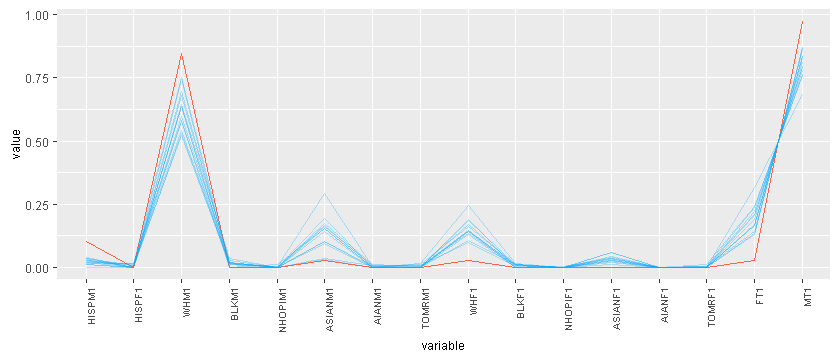

In [22]:
# Upper management
ggplot(data.upper_mgmt.melt) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, alpha=factor(class)), size=0.3) +
scale_color_manual(values=PALETTE) +
scale_alpha_manual(values=c(0.3, 1)) +
theme(axis.text.x=element_text(hjust=1, angle=90, size=6)) + theme.no_legend

In [23]:
# Middle management
data.middle_mgmt.melt = melt(data.middle_mgmt.prop[, c(2,25,9:24)], id=c("name","class"))
data.middle_mgmt.melt

name               class variable value       
1   Apple              1     HISPM1_2 0.05009141  
2   Amazon.com         1     HISPM1_2 0.03660180  
3   Costco Wholesale   2     HISPM1_2 0.12430130  
4   Alphabet           1     HISPM1_2 0.03338570  
5   Microsoft          1     HISPM1_2 0.03341956  
6   Intel              1     HISPM1_2 0.04796663  
7   Cisco Systems      1     HISPM1_2 0.03209128  
8   HP                 1     HISPM1_2 0.03481958  
9   Facebook           1     HISPM1_2 0.01901469  
10  Qualcomm           1     HISPM1_2 0.03330192  
11  eBay               1     HISPM1_2 0.02123552  
12  Jones Lang LaSalle 1     HISPM1_2 0.03147854  
13  Adobe Systems      1     HISPM1_2 0.01975752  
14  Yahoo              1     HISPM1_2 0.02600473  
15  Apple              1     HISPF1_2 0.01815966  
16  Amazon.com         1     HISPF1_2 0.01264970  
17  Costco Wholesale   2     HISPF1_2 0.05509715  
18  Alphabet           1     HISPF1_2 0.01934407  
19  Microsoft          1     HISPF1_2 0.01158820  
20  Intel              1     HISPF1_2 0.01608819  
21  Cisco Systems      1     HISPF1_2 0.01586736  
22  HP                 1     HISPF1_2 0.01597334  
23  Facebook           1     HISPF1_2 0.01469317  
24  Qualcomm           1     HISPF1_2 0.01319510  
25  eBay               1     HISPF1_2 0.01287001  
26  Jones Lang LaSalle 1     HISPF1_2 0.02639110  
27  Adobe Systems      1     HISPF1_2 0.01885945  
28  Yahoo              1     HISPF1_2 0.01536643  
29  Apple              1     WHM1_2   0.47568556  
30  Amazon.com         1     WHM1_2   0.51197605  
... ...                ...   ...      ...         
195 Adobe Systems      1     TOMRF1_2 0.0004490346
196 Yahoo              1     TOMRF1_2 0.0130023641
197 Apple              1     FT1_2    0.2742230347
198 Amazon.com         1     FT1_2    0.2298652695
199 Costco Wholesale   2     FT1_2    0.3090231568
200 Alphabet           1     FT1_2    0.3893362137
201 Microsoft          1     FT1_2    0.2147956544
202 Intel              1     FT1_2    0.2285118427
203 Cisco Systems      1     FT1_2    0.2280263862
204 HP                 1     FT1_2    0.2901631809
205 Facebook           1     FT1_2    0.2860847018
206 Qualcomm           1     FT1_2    0.2007540057
207 eBay               1     FT1_2    0.3841698842
208 Jones Lang LaSalle 1     FT1_2    0.3608903021
209 Adobe Systems      1     FT1_2    0.3511450382
210 Yahoo              1     FT1_2    0.2943262411
211 Apple              1     MT1_2    0.7257769653
212 Amazon.com         1     MT1_2    0.7701347305
213 Costco Wholesale   2     MT1_2    0.6909768432
214 Alphabet           1     MT1_2    0.6106637863
215 Microsoft          1     MT1_2    0.7852043456
216 Intel              1     MT1_2    0.7714881573
217 Cisco Systems      1     MT1_2    0.7719736138
218 HP                 1     MT1_2    0.7098368191
219 Facebook           1     MT1_2    0.7139152982
220 Qualcomm           1     MT1_2    0.7992459943
221 eBay               1     MT1_2    0.6158301158
222 Jones Lang LaSalle 1     MT1_2    0.6391096979
223 Adobe Systems      1     MT1_2    0.6488549618
224 Yahoo              1     MT1_2    0.7056737589

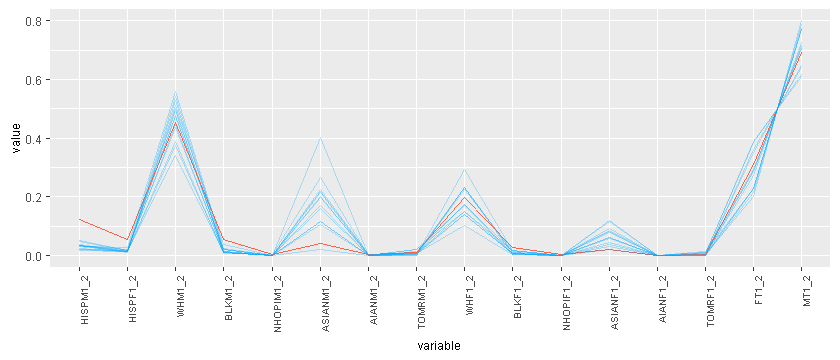

In [24]:
# Middle management
ggplot(data.middle_mgmt.melt) +
geom_line(aes(x=variable, y=value, color=factor(class), group=name, alpha=factor(class)), size=0.3) +
scale_color_manual(values=PALETTE) +
scale_alpha_manual(values=c(0.3, 1)) +
theme(axis.text.x=element_text(hjust=1, angle=90, size=6)) + theme.no_legend

**Consider results.**

Upper management: classes distinguished by differences in ...
  * HSPM1, WHM1, MT1 (red higher, blue lower)
  * ASIANM1, WHF1, ASIANF1, FT1 (red lower, blue higher)

Middle management: classes distinguished by differences in ...
  * HSPM1_2, HSPF1_2, BLKM1_2, BLKF1_2 (red higher, blue lower)
  * ASIANM1_2, ASIANF1_2 (red lower, blue higher)

## Discussion

* Cluster model constructed based on similarity discovered, not specified.
* Cluster models influenced progressively more detailed analysis.
* Overall diversity vs. management diversity.

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised May 4, 2020
</span>
</p>
</font>